In [4]:
!pip3 install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.8 MB/s eta 0:00:000:00:01m eta 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [113]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf
import time

In [114]:
seed=10
np.random.seed(seed)
(X_train,y_train), (X_test, y_test)= tf.keras.datasets.mnist.load_data()

In [115]:
X_train=X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

In [116]:
X_train=X_train/255
X_test=X_test/255
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


# CNN Architecture

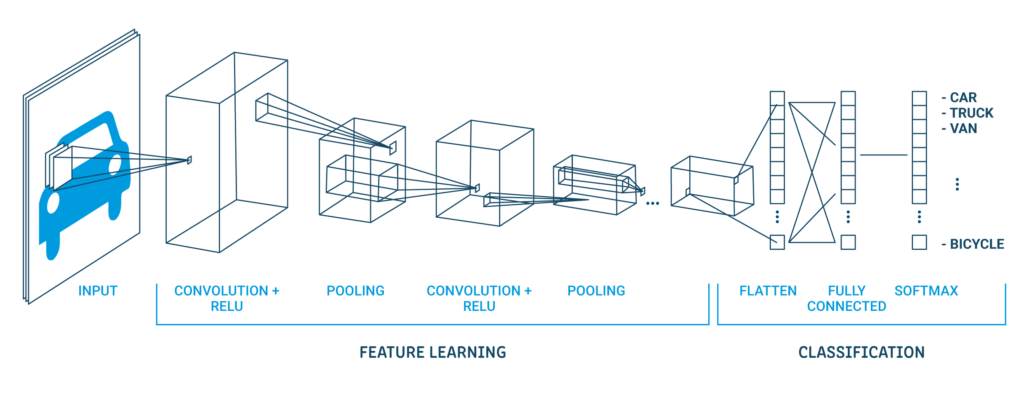

In [117]:
def cnn_model():
    model=Sequential()
    model.add(Conv2D(32,5,5, padding='same',input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
t1 = time.time_ns()
model=cnn_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)
t2 = time.time_ns()
score= model.evaluate(X_test, y_test, verbose=0)
t3 = time.time_ns()
train_time = t2-t1
evaluavation_time = t3-t2
print('The accuracy is: %.2f%%'%(score[1]*100))
print(f'training time {train_time}, evaluvation time {evaluavation_time}')


Epoch 1/10
300/300 - 1s - loss: 0.7654 - accuracy: 0.7702 - val_loss: 0.3157 - val_accuracy: 0.9030 - 916ms/epoch - 3ms/step
Epoch 2/10
300/300 - 1s - loss: 0.3582 - accuracy: 0.8887 - val_loss: 0.2207 - val_accuracy: 0.9314 - 703ms/epoch - 2ms/step
Epoch 3/10
300/300 - 1s - loss: 0.2874 - accuracy: 0.9104 - val_loss: 0.1797 - val_accuracy: 0.9454 - 692ms/epoch - 2ms/step
Epoch 4/10
300/300 - 1s - loss: 0.2494 - accuracy: 0.9219 - val_loss: 0.1597 - val_accuracy: 0.9516 - 690ms/epoch - 2ms/step
Epoch 5/10
300/300 - 1s - loss: 0.2237 - accuracy: 0.9313 - val_loss: 0.1468 - val_accuracy: 0.9554 - 696ms/epoch - 2ms/step
Epoch 6/10
300/300 - 1s - loss: 0.2058 - accuracy: 0.9360 - val_loss: 0.1315 - val_accuracy: 0.9578 - 692ms/epoch - 2ms/step
Epoch 7/10
300/300 - 1s - loss: 0.1957 - accuracy: 0.9388 - val_loss: 0.1259 - val_accuracy: 0.9619 - 687ms/epoch - 2ms/step
Epoch 8/10
300/300 - 1s - loss: 0.1824 - accuracy: 0.9419 - val_loss: 0.1161 - val_accuracy: 0.9654 - 701ms/epoch - 2ms/step


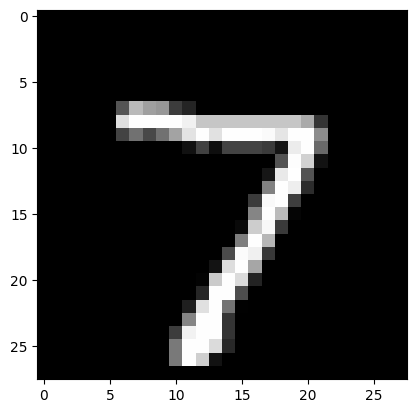

1/1 [==============================] - 0s 21ms/step
predicted output : 7
accual output : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
prediction time 33601000


In [118]:
first_image = np.array(X_test[0], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
t4 = time.time_ns()
test_input = first_image.reshape((-1, 1, 28, 28))
k = model.predict(test_input).tolist()
t5 = time.time_ns()
print(f'predicted output : {k[0].index(max(k[0]))}')
print(f'accual output : {y_test[0]}')
print(f'prediction time {t5-t4}')